In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

df = pd.read_csv('World-happiness-report-2024.csv')

BASICS

In [107]:
df.head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [108]:
df.shape

(143, 12)

In [109]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [110]:
df.dtypes

Country name                     object
Regional indicator               object
Ladder score                    float64
upperwhisker                    float64
lowerwhisker                    float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object

In [111]:
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [112]:
df.duplicated().sum()

np.int64(0)

In [113]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [114]:
print("Country : ",df['Country name'].nunique())

print("Region : " ,df['Regional indicator'].nunique())

Country :  143
Region :  10


In [115]:
maxScore = df['Ladder score'].max()
countryMax = df[df['Ladder score'] == maxScore]['Country name'].values[0]
print(maxScore)
print(countryMax)

7.741
Finland


In [116]:
print(df['Regional indicator'].mode())

0    Sub-Saharan Africa
Name: Regional indicator, dtype: object


EDA

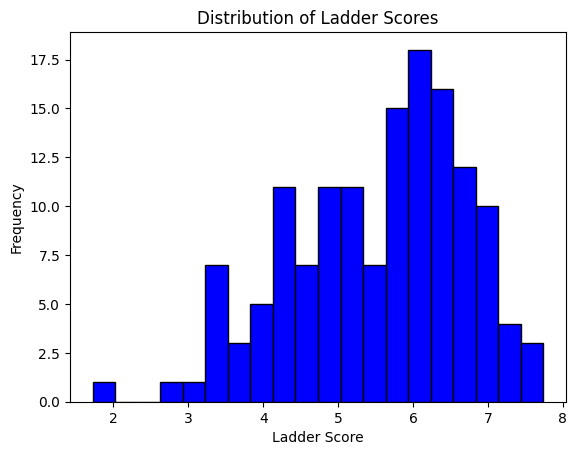

In [117]:
plt.hist(df['Ladder score'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Ladder Scores')
plt.xlabel('Ladder Score')
plt.ylabel('Frequency')

plt.show()

In [118]:
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

In [119]:
top10 = df.sort_values(by='Ladder score', ascending=False).head(10)
print(top10[['Country name', 'Ladder score']])


  Country name  Ladder score
0      Finland         7.741
1      Denmark         7.583
2      Iceland         7.525
3       Sweden         7.344
4       Israel         7.341
5  Netherlands         7.319
6       Norway         7.302
7   Luxembourg         7.122
8  Switzerland         7.060
9    Australia         7.057


In [120]:
bottom10 = df.sort_values(by='Ladder score').head(10)
print(bottom10[['Country name', 'Ladder score']])


         Country name  Ladder score
142       Afghanistan         1.721
141           Lebanon         2.707
140           Lesotho         3.186
139      Sierra Leone         3.245
138  Congo (Kinshasa)         3.295
137          Zimbabwe         3.341
136          Botswana         3.383
135            Malawi         3.421
134          Eswatini         3.502
133            Zambia         3.502


In [121]:
avg_hps_score = df.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=False)
print(avg_hps_score)

Regional indicator
North America and ANZ                 6.927750
Western Europe                        6.841650
Central and Eastern Europe            6.170941
Latin America and Caribbean           6.143368
East Asia                             5.934333
Southeast Asia                        5.551889
Commonwealth of Independent States    5.538500
Middle East and North Africa          5.199941
Sub-Saharan Africa                    4.329686
South Asia                            3.895667
Name: Ladder score, dtype: float64


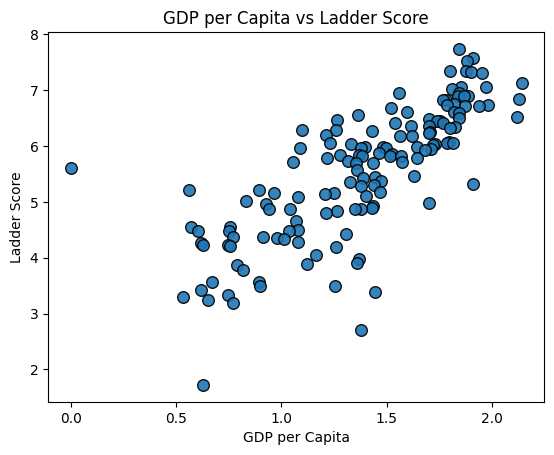

In [122]:
plt.scatter(df['Log GDP per capita'], df['Ladder score'], alpha=0.9,edgecolor='black', s=70)
plt.title('GDP per Capita vs Ladder Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Ladder Score')
plt.show()

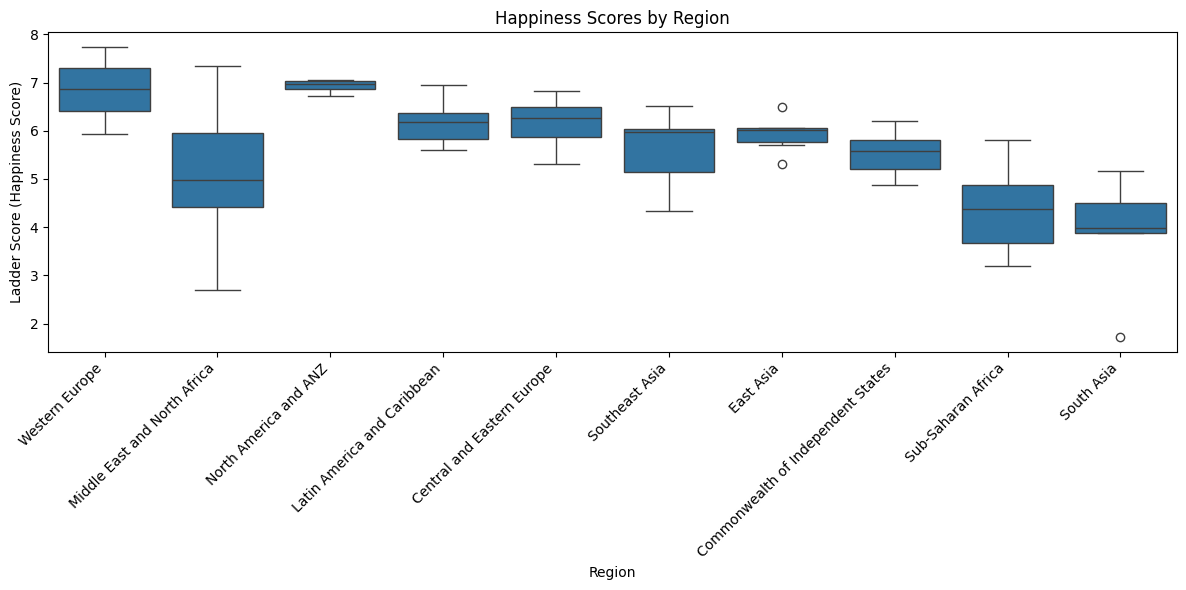

In [123]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Regional indicator', y='Ladder score', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Happiness Scores by Region')
plt.xlabel('Region')
plt.ylabel('Ladder Score (Happiness Score)')
plt.tight_layout()
plt.show()

STATISTICS

In [124]:
df['Ladder score'].mean()
df['Ladder score'].median()
df['Ladder score'].mode()

0    3.502
1    5.816
2    6.188
Name: Ladder score, dtype: float64

In [125]:
print(df['Ladder score'].std())
print(df['Ladder score'].var())

1.1707165099442993
1.370577146656161


In [126]:
below_avg = df[df['Ladder score'] < df['Ladder score'].mean()]

below_avg_pct = (below_avg.shape[0] / df.shape[0]) * 100
print(below_avg_pct)

44.05594405594406


In [127]:
top20 = df.nlargest(20, 'Ladder score')
most_common_region = top20['Regional indicator'].mode()[0]
count = top20['Regional indicator'].value_counts().iloc[0]

print(most_common_region)


Western Europe


LINEAR ALGEBRA

In [128]:
ls = np.array(df['Ladder score'])
gdp = np.array(df['Log GDP per capita'])

print(ls)
print(gdp)

[7.741 7.583 7.525 7.344 7.341 7.319 7.302 7.122 7.06  7.057 7.029 6.955
 6.951 6.905 6.9   6.894 6.838 6.822 6.818 6.749 6.743 6.733 6.725 6.719
 6.678 6.611 6.609 6.594 6.561 6.523 6.503 6.491 6.469 6.448 6.442 6.421
 6.411 6.36  6.358 6.346 6.324 6.287 6.284 6.272 6.257 6.234 6.195 6.188
 6.188 6.068 6.06  6.058 6.048 6.043 6.03  6.017 5.977 5.976 5.975 5.973
 5.968 5.959 5.942 5.934 5.877 5.866 5.842 5.841 5.823 5.816 5.816 5.785
 5.784 5.725 5.714 5.707 5.696 5.695 5.607 5.568 5.463 5.455 5.422 5.369
 5.364 5.316 5.304 5.281 5.221 5.216 5.185 5.166 5.158 5.139 5.106 5.08
 5.023 4.975 4.969 4.923 4.893 4.881 4.879 4.874 4.873 4.832 4.795 4.657
 4.556 4.548 4.505 4.485 4.471 4.47  4.422 4.377 4.372 4.354 4.341 4.289
 4.269 4.232 4.228 4.214 4.186 4.054 3.977 3.898 3.886 3.861 3.781 3.566
 3.561 3.502 3.502 3.421 3.383 3.341 3.295 3.245 3.186 2.707 1.721]
[1.844      1.908      1.881      1.878      1.803      1.901
 1.952      2.141      1.97       1.854      1.81       1.561
 1.845

In [129]:
ad = np.add(ls, gdp)
sub = np.subtract(ls, gdp)

print(ad)
print(sub)

[9.585      9.491      9.406      9.222      9.144      9.22
 9.254      9.263      9.03       8.911      8.839      8.516
 8.796      8.79       8.74       8.762      8.967      8.605
 8.584      8.571      8.529      8.716      8.664      8.59
 8.199      8.207      8.427      8.436      7.925      8.641
 8.345      8.19       7.734      8.2        8.18       8.187
 7.949      7.976      8.06       8.173      8.124      7.547
 7.381      7.702      7.963      7.934      7.407      7.75
 7.81       7.862      7.846      7.873      7.28       7.374
 7.758      7.739      7.375      7.46       7.621      7.47
 7.059      7.33780714 7.652      7.618      7.342      7.392
 7.122      7.212      7.34       7.386      7.201      7.427
 7.001      7.04       6.768      7.278      7.049      7.132
 5.607      6.929      7.092      6.899      6.811      6.844
 6.688      7.225      6.742      6.65980714 6.113      5.776
 6.652      6.415      6.123      6.347      6.509      6.16
 5.854      6

In [130]:
dot = np.dot(ls, gdp)
print(dot)

1143.5100863357143


In [131]:

X = df[['Log GDP per capita', 'Social support']].to_numpy()
weights = np.array([0.5, 0.5])
result = X.dot(weights)
df['Weighted_Score'] = result
print(df[['Log GDP per capita', 'Social support', 'Weighted_Score']].head())


   Log GDP per capita  Social support  Weighted_Score
0               1.844           1.572          1.7080
1               1.908           1.520          1.7140
2               1.881           1.617          1.7490
3               1.878           1.501          1.6895
4               1.803           1.513          1.6580


In [132]:
norm = np.linalg.norm(ls)
print(norm)

67.55638187469782


CALCULUS

In [133]:

happiness, gdp_sym = sp.symbols('happiness gdp_sym')
Wellbeing_index = (gdp_sym * happiness) + 0.5 * (happiness - 5)**2
derivative = sp.diff(Wellbeing_index, happiness)
print(derivative)


gdp_sym + 1.0*happiness - 5.0


FEATURE ENGINEERING

In [134]:
df['is_happy'] = np.where(df['Ladder score'] > 7, 1, 0)
df.head(3)


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Weighted_Score,is_happy
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.708,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,1.714,1
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,1.749,1


In [135]:
df['happiness_rank'] = df['Ladder score'].rank(ascending=False)

In [136]:
df['ab_avg_gdp'] = np.where(df['Log GDP per capita'] > df['Log GDP per capita'].mean(), 1, 0)

In [137]:
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Weighted_Score,is_happy,happiness_rank,ab_avg_gdp
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.7080,1,1.0,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,1.7140,1,2.0,1
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,1.7490,1,3.0,1
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,1.6895,1,4.0,1
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,1.6580,1,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,0.5995,0,139.0,0
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,0.6100,0,140.0,0
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,0.8110,0,141.0,0
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,0.9770,0,142.0,0


In [138]:
df['LifeExp_quartile'] = pd.qcut(df['Healthy life expectancy'], 
                                 q=4,
                                 labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])

print(df[['Country name', 'Healthy life expectancy', 'LifeExp_quartile']].head())


  Country name  Healthy life expectancy LifeExp_quartile
0      Finland                    0.695     Q4 (Highest)
1      Denmark                    0.699     Q4 (Highest)
2      Iceland                    0.718     Q4 (Highest)
3       Sweden                    0.724     Q4 (Highest)
4       Israel                    0.740     Q4 (Highest)


SQL SIMULATION

In [139]:
df[df['Ladder score'] > 7]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Weighted_Score,is_happy,happiness_rank,ab_avg_gdp,LifeExp_quartile
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.7080,1,1.0,1,Q4 (Highest)
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,1.7140,1,2.0,1,Q4 (Highest)
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,1.7490,1,3.0,1,Q4 (Highest)
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,1.6895,1,4.0,1,Q4 (Highest)
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,1.6580,1,5.0,1,Q4 (Highest)
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906,1.6815,1,6.0,1,Q4 (Highest)
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586,1.7345,1,7.0,1,Q4 (Highest)
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540,1.7480,1,8.0,1,Q4 (Highest)
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488,1.6975,1,9.0,1,Q4 (Highest)
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745,1.6575,1,10.0,1,Q4 (Highest)


In [140]:
desc_gdp = df['Log GDP per capita'].sort_values(ascending=False)
print(desc_gdp.head(10))

7     2.141
16    2.129
29    2.118
21    1.983
8     1.970
6     1.952
22    1.939
85    1.909
1     1.908
5     1.901
Name: Log GDP per capita, dtype: float64


In [141]:
avg_ls = df.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=False)
print(avg_ls)

Regional indicator
North America and ANZ                 6.927750
Western Europe                        6.841650
Central and Eastern Europe            6.170941
Latin America and Caribbean           6.143368
East Asia                             5.934333
Southeast Asia                        5.551889
Commonwealth of Independent States    5.538500
Middle East and North Africa          5.199941
Sub-Saharan Africa                    4.329686
South Asia                            3.895667
Name: Ladder score, dtype: float64


In [142]:
print(avg_ls.head(5))

Regional indicator
North America and ANZ          6.927750
Western Europe                 6.841650
Central and Eastern Europe     6.170941
Latin America and Caribbean    6.143368
East Asia                      5.934333
Name: Ladder score, dtype: float64


In [143]:
df[df['Healthy life expectancy'] > 70 ]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Weighted_Score,is_happy,happiness_rank,ab_avg_gdp,LifeExp_quartile


INSIGHTS

In [144]:
# happiest country 
df[df['Ladder score'] == df['Ladder score'].max()]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Weighted_Score,is_happy,happiness_rank,ab_avg_gdp,LifeExp_quartile
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.708,1,1.0,1,Q4 (Highest)


In [145]:
# region with highest average happiness score
df.groupby('Regional indicator')['Ladder score'].mean().idxmax()

'North America and ANZ'

0.7671814730709575


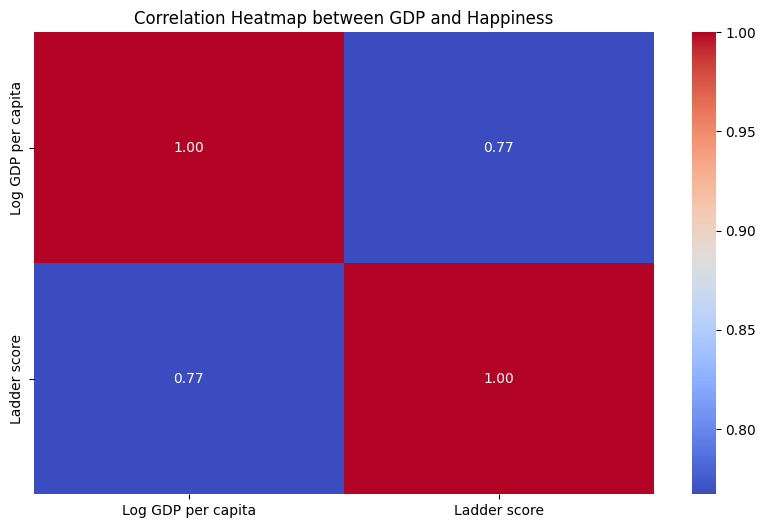

In [146]:
# correlation between GDP and happineess
correlation = df['Log GDP per capita'].corr(df['Ladder score'])
print(correlation)

plt.figure(figsize=(10, 6))
sns.heatmap(df[['Log GDP per capita', 'Ladder score']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between GDP and Happiness')
plt.show()



In [147]:

rich_countries = df[df['Log GDP per capita'] > df['Log GDP per capita'].mean()]
rich_countries[['Country name', 'Ladder score', 'Log GDP per capita']].sort_values(by='Ladder score', ascending=False)

 

,Country name,Ladder score,Log GDP per capita
0,Finland,7.741,1.844000
1,Denmark,7.583,1.908000
2,Iceland,7.525,1.881000
3,Sweden,7.344,1.878000
4,Israel,7.341,1.803000
...,...,...,...
97,Turkiye,4.975,1.702000
99,Iran,4.923,1.435000
100,Azerbaijan,4.893,1.433000
102,State of Palestine,4.879,1.378807


In [148]:
# highest life expectancy by region

highest_life_exp = df.groupby('Regional indicator')['Healthy life expectancy'].mean().idxmax()
print(highest_life_exp)

Western Europe


In [149]:

df.sort_values(by='Freedom to make life choices', ascending=False).head(10)


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Weighted_Score,is_happy,happiness_rank,ab_avg_gdp,LifeExp_quartile
118,Cambodia,Southeast Asia,4.341,4.446,4.236,1.011,1.019,0.442,0.863,0.170,0.071,0.765,1.0150,0,119.0,0,Q2
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.7080,1,1.0,1,Q4 (Highest)
53,Vietnam,Southeast Asia,6.043,6.138,5.948,1.331,1.267,0.539,0.843,0.094,0.160,1.810,1.2990,0,54.0,0,Q2
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,1.6895,1,4.0,1,Q4 (Highest)
46,Uzbekistan,Commonwealth of Independent States,6.195,6.303,6.087,1.212,1.394,0.539,0.835,0.251,0.215,1.749,1.3030,0,47.0,0,Q2
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586,1.7345,1,7.0,1,Q4 (Highest)
74,Kyrgyzstan,Commonwealth of Independent States,5.714,5.795,5.632,1.054,1.477,0.588,0.834,0.225,0.030,1.505,1.2655,0,75.0,0,Q3
58,Malaysia,Southeast Asia,5.975,6.078,5.872,1.646,1.143,0.540,0.829,0.226,0.119,1.473,1.3945,0,59.0,1,Q2
12,Kuwait,Middle East and North Africa,6.951,7.060,6.843,1.845,1.364,0.661,0.827,0.200,0.172,1.884,1.6045,0,13.0,1,Q4 (Highest)
52,Philippines,Southeast Asia,6.048,6.166,5.929,1.232,1.146,0.441,0.826,0.099,0.136,2.167,1.1890,0,53.0,0,Q2


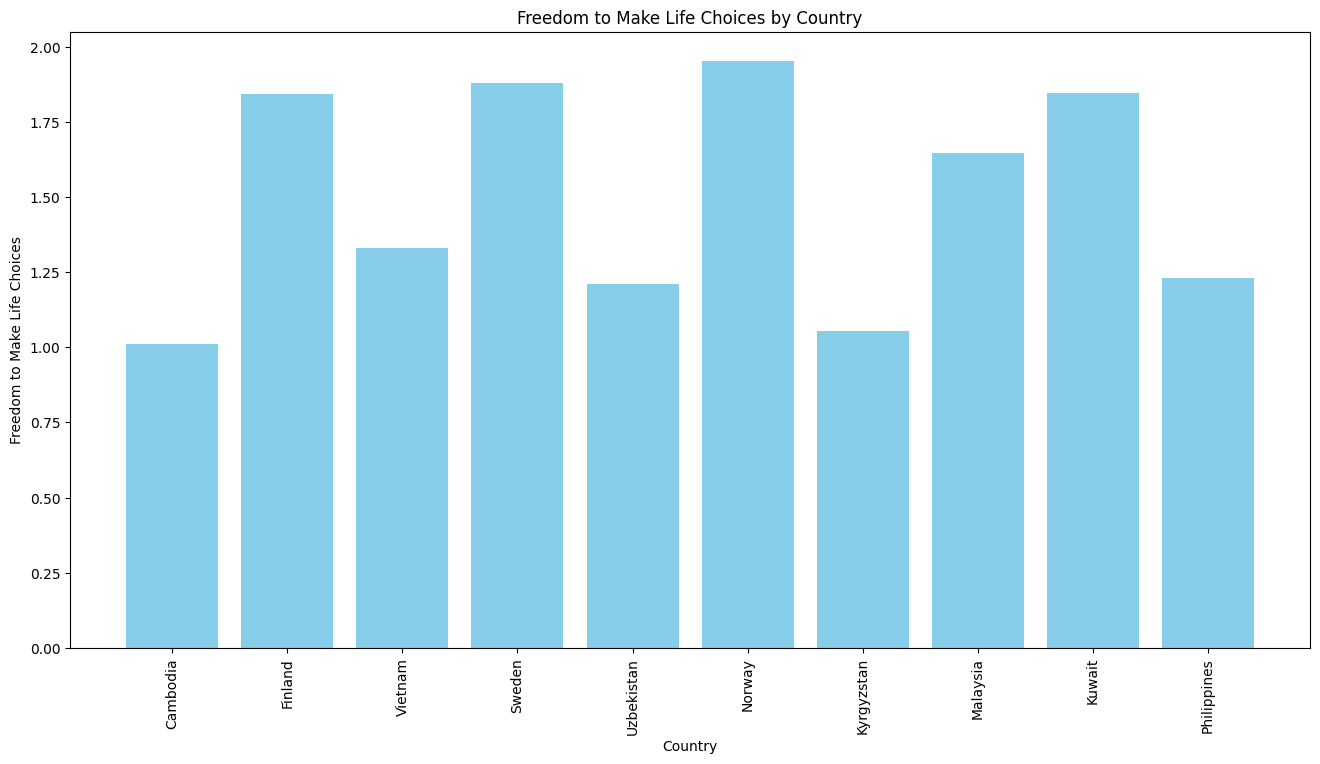

In [150]:
plt.figure(figsize=(16, 8))
ascc = df.sort_values(by='Freedom to make life choices', ascending=False).head(10)
plt.bar(ascc['Country name'], ascc['Log GDP per capita'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Freedom to Make Life Choices by Country')
plt.xlabel('Country')
plt.ylabel('Freedom to Make Life Choices')
plt.show()

In [151]:
df.sort_values(by='Log GDP per capita', ascending=False).head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Weighted_Score,is_happy,happiness_rank,ab_avg_gdp,LifeExp_quartile
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540,1.7480,1,8.0,1,Q4 (Highest)
16,Ireland,Western Europe,6.838,6.927,6.749,2.129,1.390,0.700,0.758,0.205,0.418,1.239,1.7595,0,17.0,1,Q4 (Highest)
29,Singapore,Southeast Asia,6.523,6.605,6.440,2.118,1.361,0.769,0.743,0.168,0.575,0.788,1.7395,0,30.0,1,Q4 (Highest)
21,United Arab Emirates,Middle East and North Africa,6.733,6.823,6.643,1.983,1.164,0.563,0.815,0.209,0.258,1.741,1.5735,0,22.0,1,Q3
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488,1.6975,1,9.0,1,Q4 (Highest)
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586,1.7345,1,7.0,1,Q4 (Highest)
22,United States,North America and ANZ,6.725,6.818,6.631,1.939,1.392,0.542,0.586,0.223,0.169,1.873,1.6655,0,23.0,1,Q2
85,Hong Kong S.A.R. of China,East Asia,5.316,5.403,5.229,1.909,1.184,0.857,0.485,0.147,0.402,0.333,1.5465,0,86.0,1,Q4 (Highest)
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,1.7140,1,2.0,1,Q4 (Highest)
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906,1.6815,1,6.0,1,Q4 (Highest)


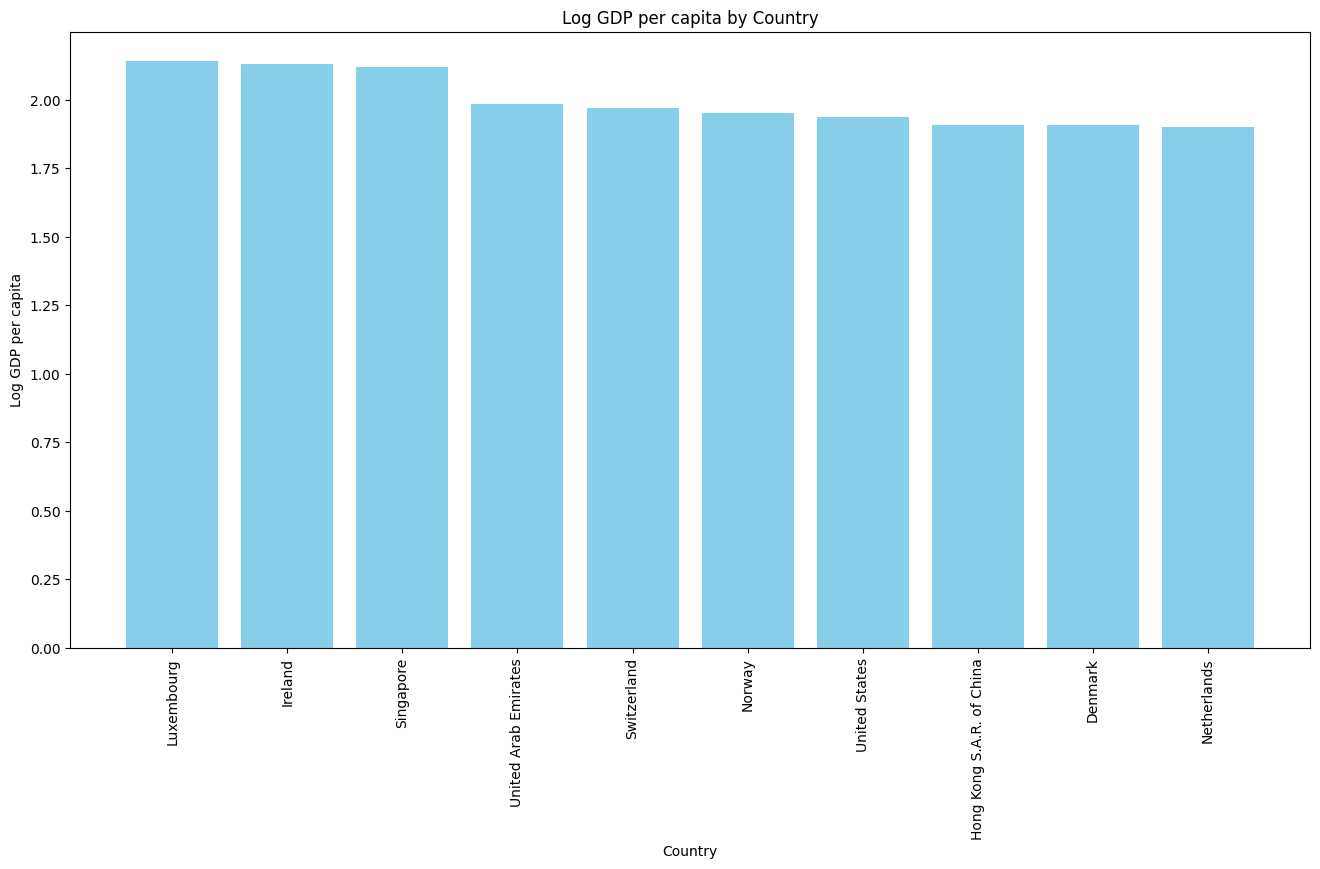

In [152]:
plt.figure(figsize=(16, 8))
asc = df.sort_values(by='Log GDP per capita', ascending=False).head(10)
plt.bar(asc['Country name'], asc['Log GDP per capita'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Log GDP per capita by Country')
plt.xlabel('Country')
plt.ylabel('Log GDP per capita')
plt.show()

In [153]:
df.sort_values(by='Generosity', ascending=False).head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Weighted_Score,is_happy,happiness_rank,ab_avg_gdp,LifeExp_quartile
117,Myanmar,Southeast Asia,4.354,4.501,4.208,0.978,0.988,0.436,0.450,0.401,0.174,0.928,0.9830,0,118.0,0,Q2
79,Indonesia,Southeast Asia,5.568,5.670,5.466,1.361,1.184,0.472,0.779,0.399,0.055,1.318,1.2725,0,80.0,0,Q2
111,Gambia,Sub-Saharan Africa,4.485,4.625,4.344,0.750,0.684,0.330,0.459,0.324,0.048,1.890,0.7170,0,112.0,0,Q1 (Lowest)
104,Ukraine,Commonwealth of Independent States,4.873,4.988,4.758,1.350,1.315,0.513,0.631,0.285,0.025,0.753,1.3325,0,105.0,0,Q2
57,Thailand,Southeast Asia,5.976,6.094,5.858,1.484,1.347,0.620,0.756,0.283,0.024,1.463,1.4155,0,58.0,1,Q3
113,Kenya,Sub-Saharan Africa,4.470,4.595,4.344,1.037,0.895,0.353,0.519,0.282,0.069,1.316,0.9660,0,114.0,0,Q1 (Lowest)
129,Ethiopia,Sub-Saharan Africa,3.861,3.997,3.725,0.792,0.915,0.420,0.441,0.270,0.101,0.923,0.8535,0,130.0,0,Q2
19,United Kingdom,Western Europe,6.749,6.833,6.665,1.822,1.326,0.672,0.713,0.267,0.351,1.598,1.5740,0,20.0,1,Q4 (Highest)
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,1.7490,1,3.0,1,Q4 (Highest)
28,Kosovo,Central and Eastern Europe,6.561,6.667,6.455,1.364,1.277,0.599,0.739,0.254,0.073,2.255,1.3205,0,29.0,0,Q3


In [154]:

df.sort_values(by='Perceptions of corruption', ascending=False).head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Weighted_Score,is_happy,happiness_rank,ab_avg_gdp,LifeExp_quartile
29,Singapore,Southeast Asia,6.523,6.605,6.440,2.118,1.361,0.769,0.743,0.168,0.575,0.788,1.7395,0,30.0,1,Q4 (Highest)
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,1.7140,1,2.0,1,Q4 (Highest)
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.7080,1,1.0,1,Q4 (Highest)
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,1.6895,1,4.0,1,Q4 (Highest)
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488,1.6975,1,9.0,1,Q4 (Highest)
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586,1.7345,1,7.0,1,Q4 (Highest)
10,New Zealand,North America and ANZ,7.029,7.105,6.954,1.810,1.527,0.673,0.746,0.226,0.480,1.567,1.6685,1,11.0,1,Q4 (Highest)
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540,1.7480,1,8.0,1,Q4 (Highest)
16,Ireland,Western Europe,6.838,6.927,6.749,2.129,1.390,0.700,0.758,0.205,0.418,1.239,1.7595,0,17.0,1,Q4 (Highest)
85,Hong Kong S.A.R. of China,East Asia,5.316,5.403,5.229,1.909,1.184,0.857,0.485,0.147,0.402,0.333,1.5465,0,86.0,1,Q4 (Highest)


In [155]:
df.sort_values(by='Social support', ascending=False).head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Weighted_Score,is_happy,happiness_rank,ab_avg_gdp,LifeExp_quartile
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,1.7490,1,3.0,1,Q4 (Highest)
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.7080,1,1.0,1,Q4 (Highest)
44,Slovakia,Central and Eastern Europe,6.257,6.332,6.182,1.706,1.540,0.638,0.566,0.096,0.058,1.653,1.6230,0,45.0,1,Q3
55,Hungary,Central and Eastern Europe,6.017,6.124,5.910,1.722,1.528,0.596,0.581,0.123,0.067,1.400,1.6250,0,56.0,1,Q3
33,Estonia,Central and Eastern Europe,6.448,6.524,6.371,1.752,1.527,0.657,0.805,0.166,0.401,1.138,1.6395,0,34.0,1,Q4 (Highest)
10,New Zealand,North America and ANZ,7.029,7.105,6.954,1.810,1.527,0.673,0.746,0.226,0.480,1.567,1.6685,1,11.0,1,Q4 (Highest)
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,1.7140,1,2.0,1,Q4 (Highest)
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586,1.7345,1,7.0,1,Q4 (Highest)
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,1.6580,1,5.0,1,Q4 (Highest)
17,Czechia,Central and Eastern Europe,6.822,6.903,6.741,1.783,1.511,0.638,0.787,0.177,0.068,1.858,1.6470,0,18.0,1,Q3


In [156]:

western_europe = df[df['Regional indicator'] == 'Western Europe'][[
    'Ladder score',
    'Freedom to make life choices',
    'Social support',
    'Perceptions of corruption',
    'Generosity'
]]
print(western_europe)

    Ladder score  Freedom to make life choices  Social support  \
0          7.741                         0.859           1.572   
1          7.583                         0.823           1.520   
2          7.525                         0.819           1.617   
3          7.344                         0.838           1.501   
5          7.319                         0.725           1.462   
6          7.302                         0.835           1.517   
7          7.122                         0.801           1.355   
8          7.060                         0.759           1.425   
13         6.905                         0.703           1.336   
15         6.894                         0.729           1.440   
16         6.838                         0.758           1.390   
19         6.749                         0.713           1.326   
23         6.719                         0.700           1.390   
26         6.609                         0.650           1.348   
35        

In [157]:
df[df['Country name'] == 'India']

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Weighted_Score,is_happy,happiness_rank,ab_avg_gdp,LifeExp_quartile
125,India,South Asia,4.054,4.123,3.985,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.9095,0,126.0,0,Q2
